## Smart personality-prediction

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

ModuleNotFoundError: No module named 'seaborn'

#### Loading our Data Set taken from kaggle

In [ ]:
data_raw = pd.read_csv('./data-final.csv', sep='\t')
data = data_raw.copy()
pd.options.display.max_columns = 150

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

print('Number of participants: ', len(data))
data.head()

Number of participants:  1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


#### Understanding the Data Set

In [ ]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  89227
Number of participants after eliminating missing values:  1013481


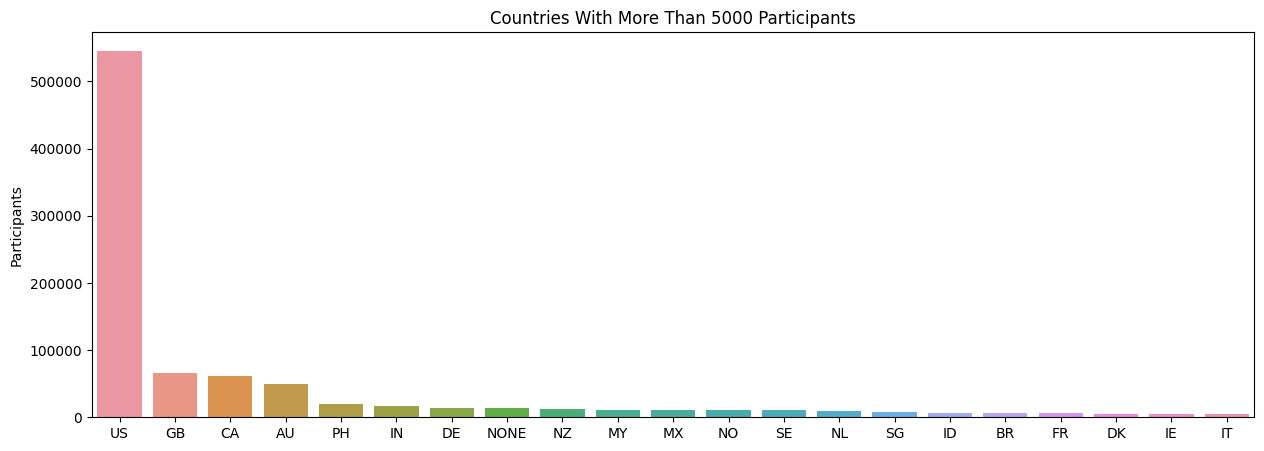

In [ ]:
# Participants' nationality distriution
countries = pd.DataFrame(data['country'].value_counts())
countries_5000 = countries[countries['country'] >= 5000]
plt.figure(figsize=(15,5))
sns.barplot(data=countries_5000, x=countries_5000.index, y='country')
plt.title('Countries With More Than 5000 Participants')
plt.ylabel('Participants');

In [ ]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

In [ ]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

Q&As Related to Extroversion Personality


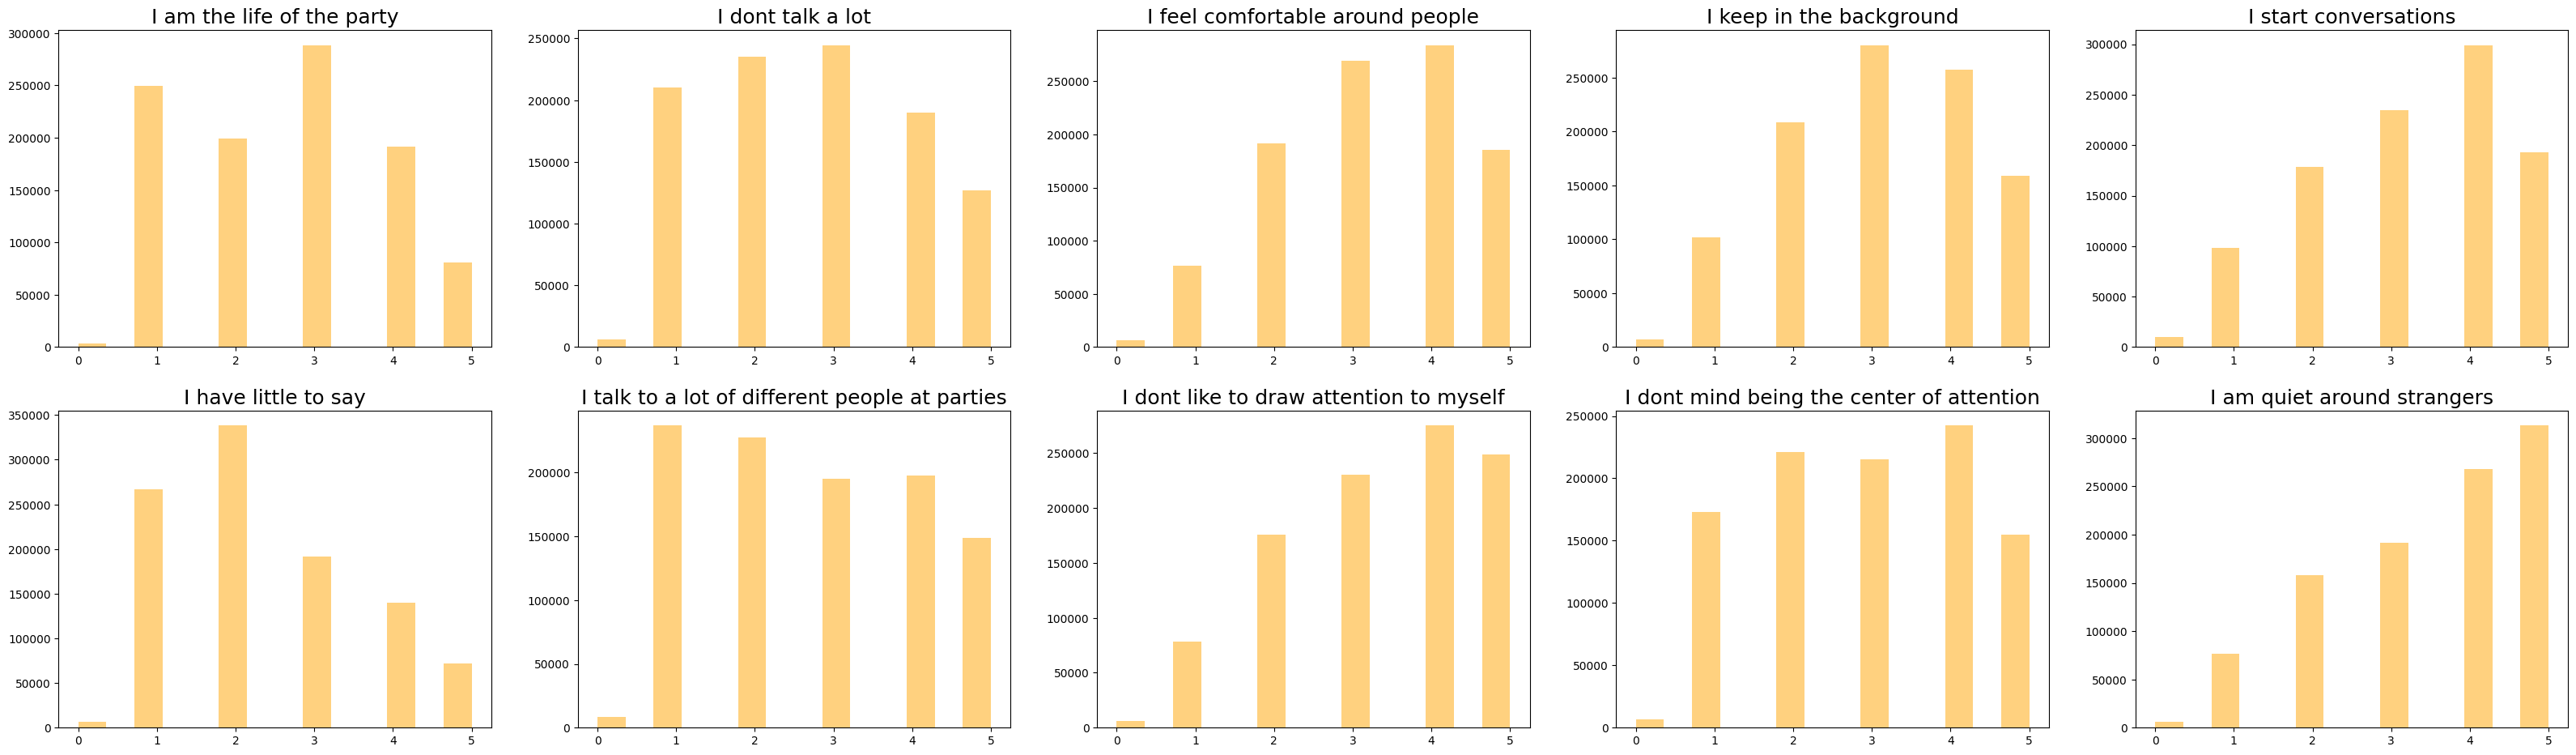

In [ ]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'orange')

Q&As Related to Neuroticism Personality


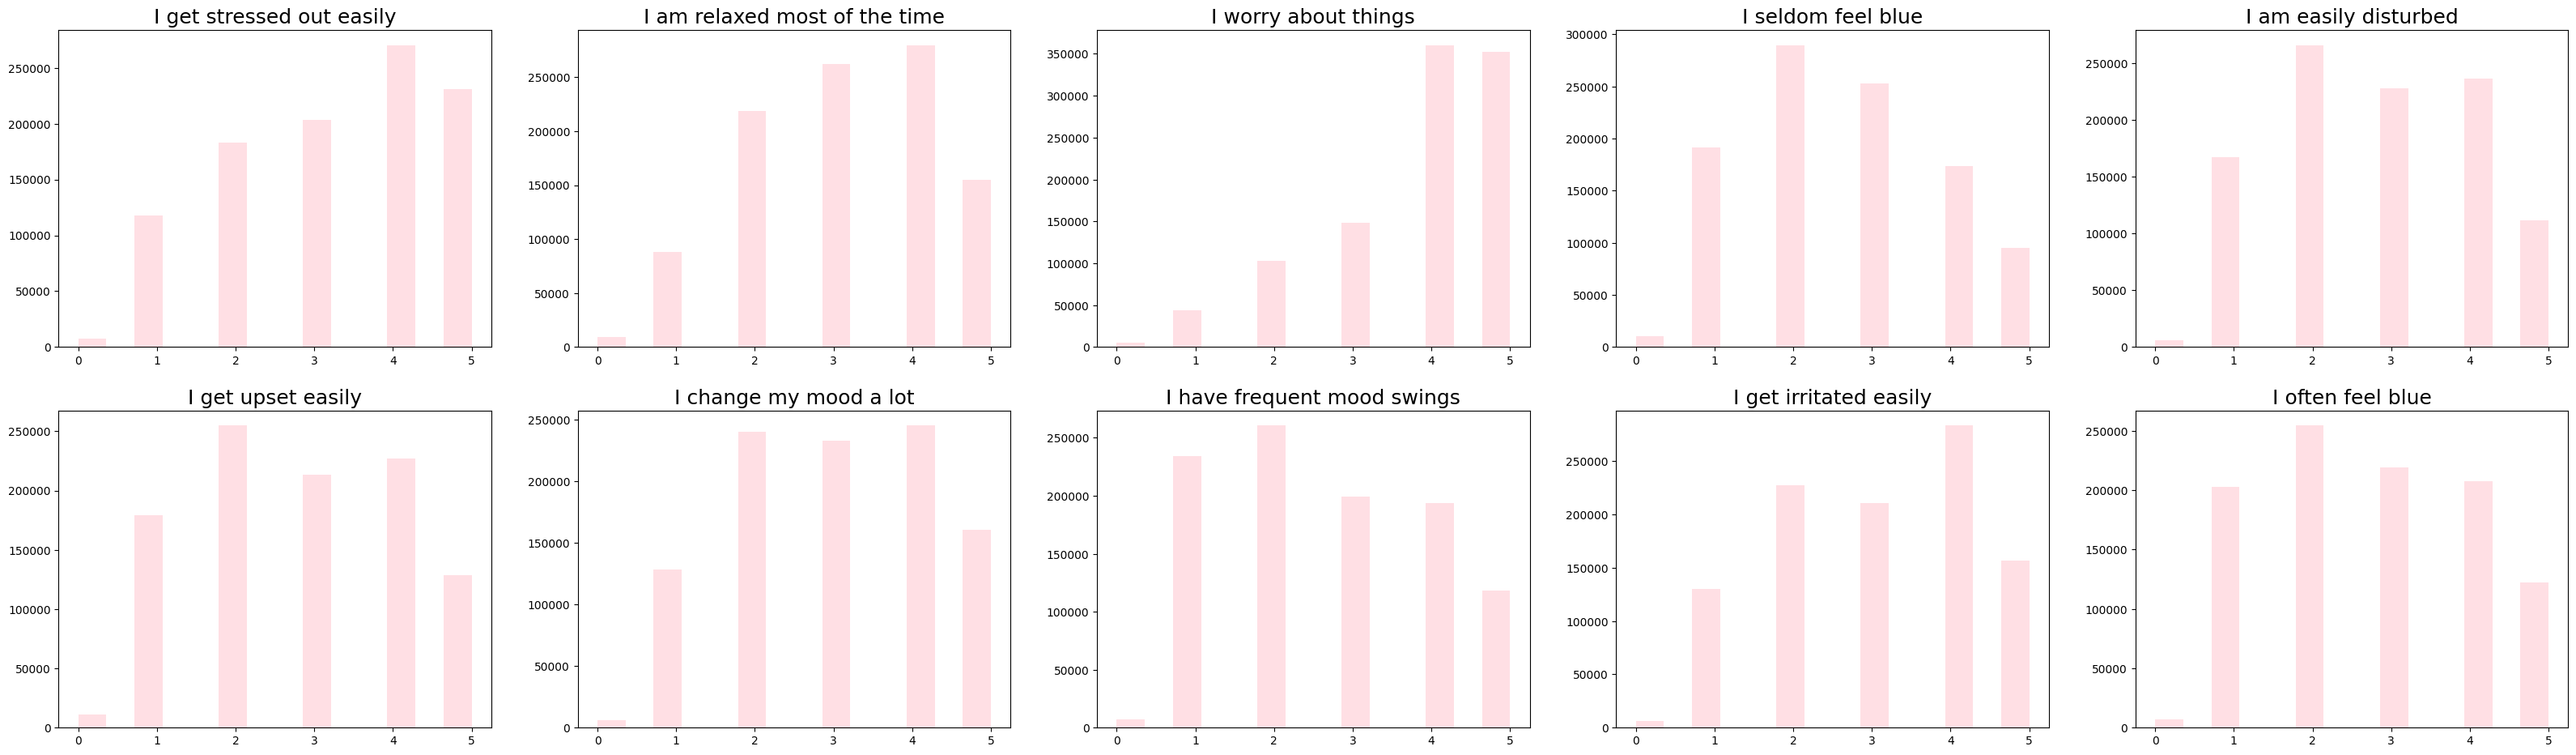

In [ ]:
print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'pink')

Q&As Related to Agreeable Personality


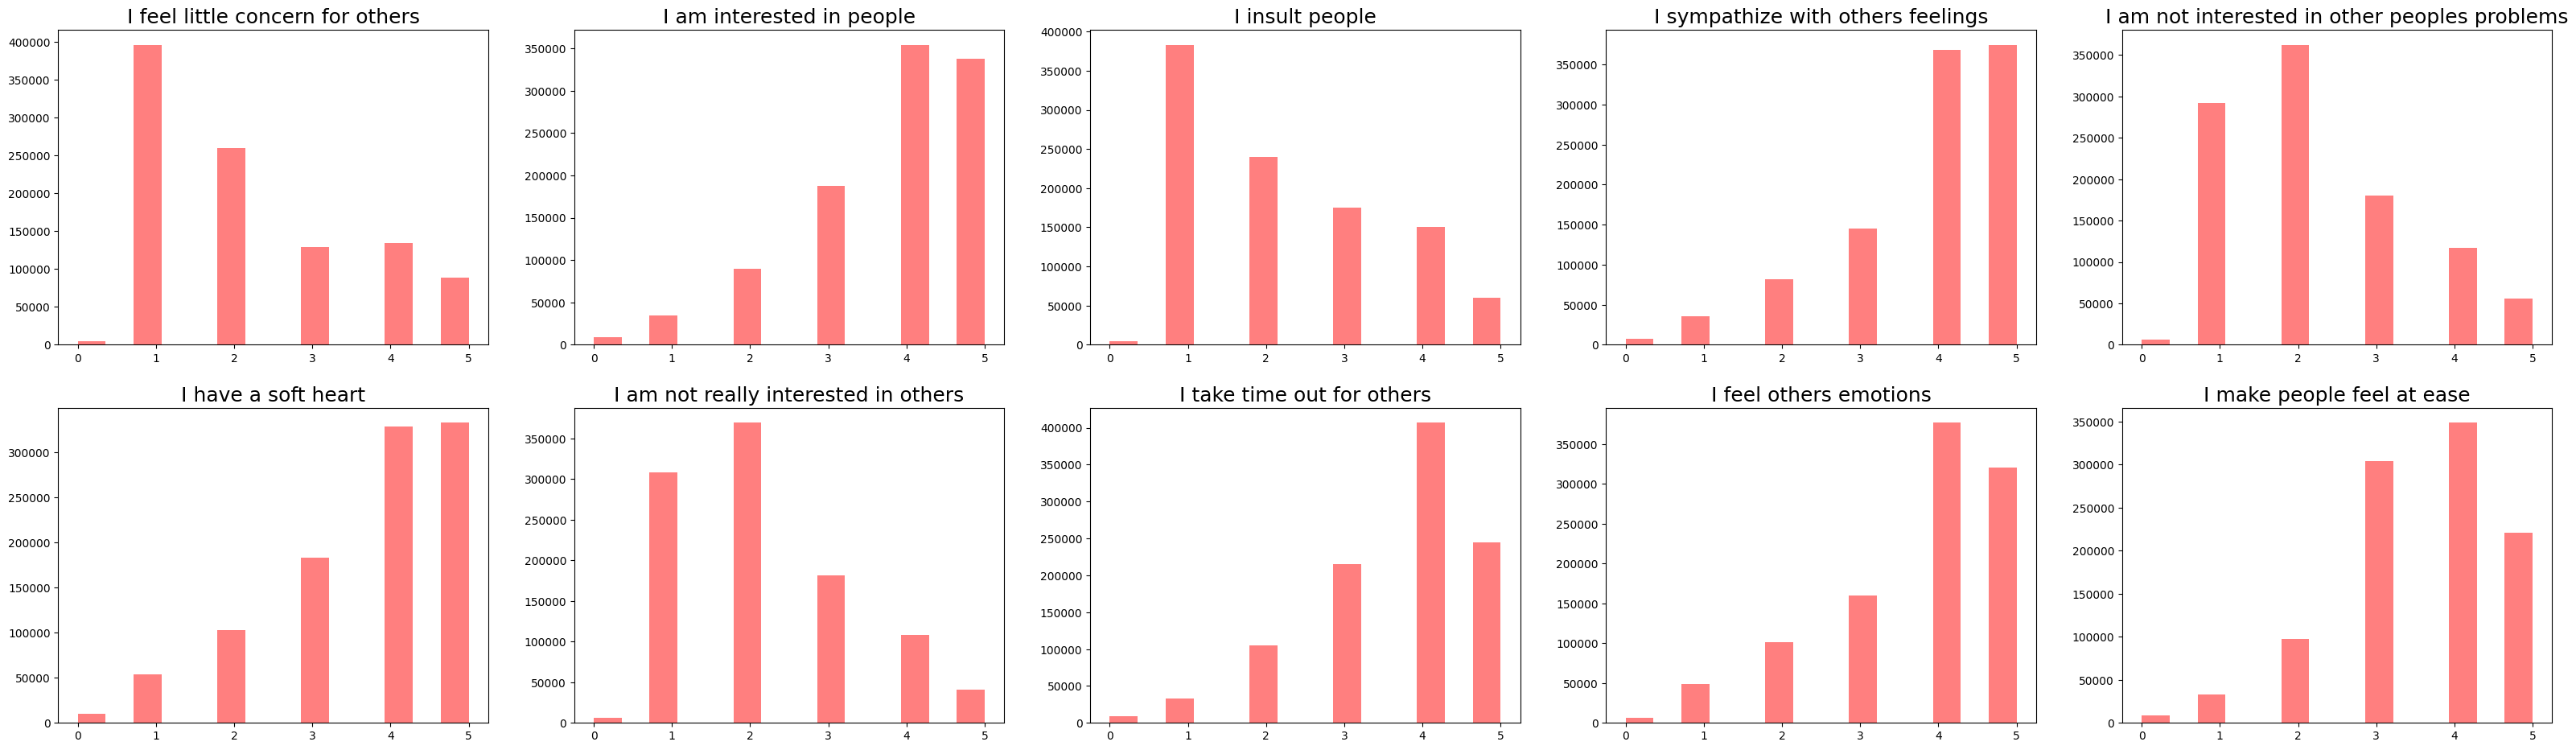

In [ ]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'red')

Q&As Related to Conscientious Personality


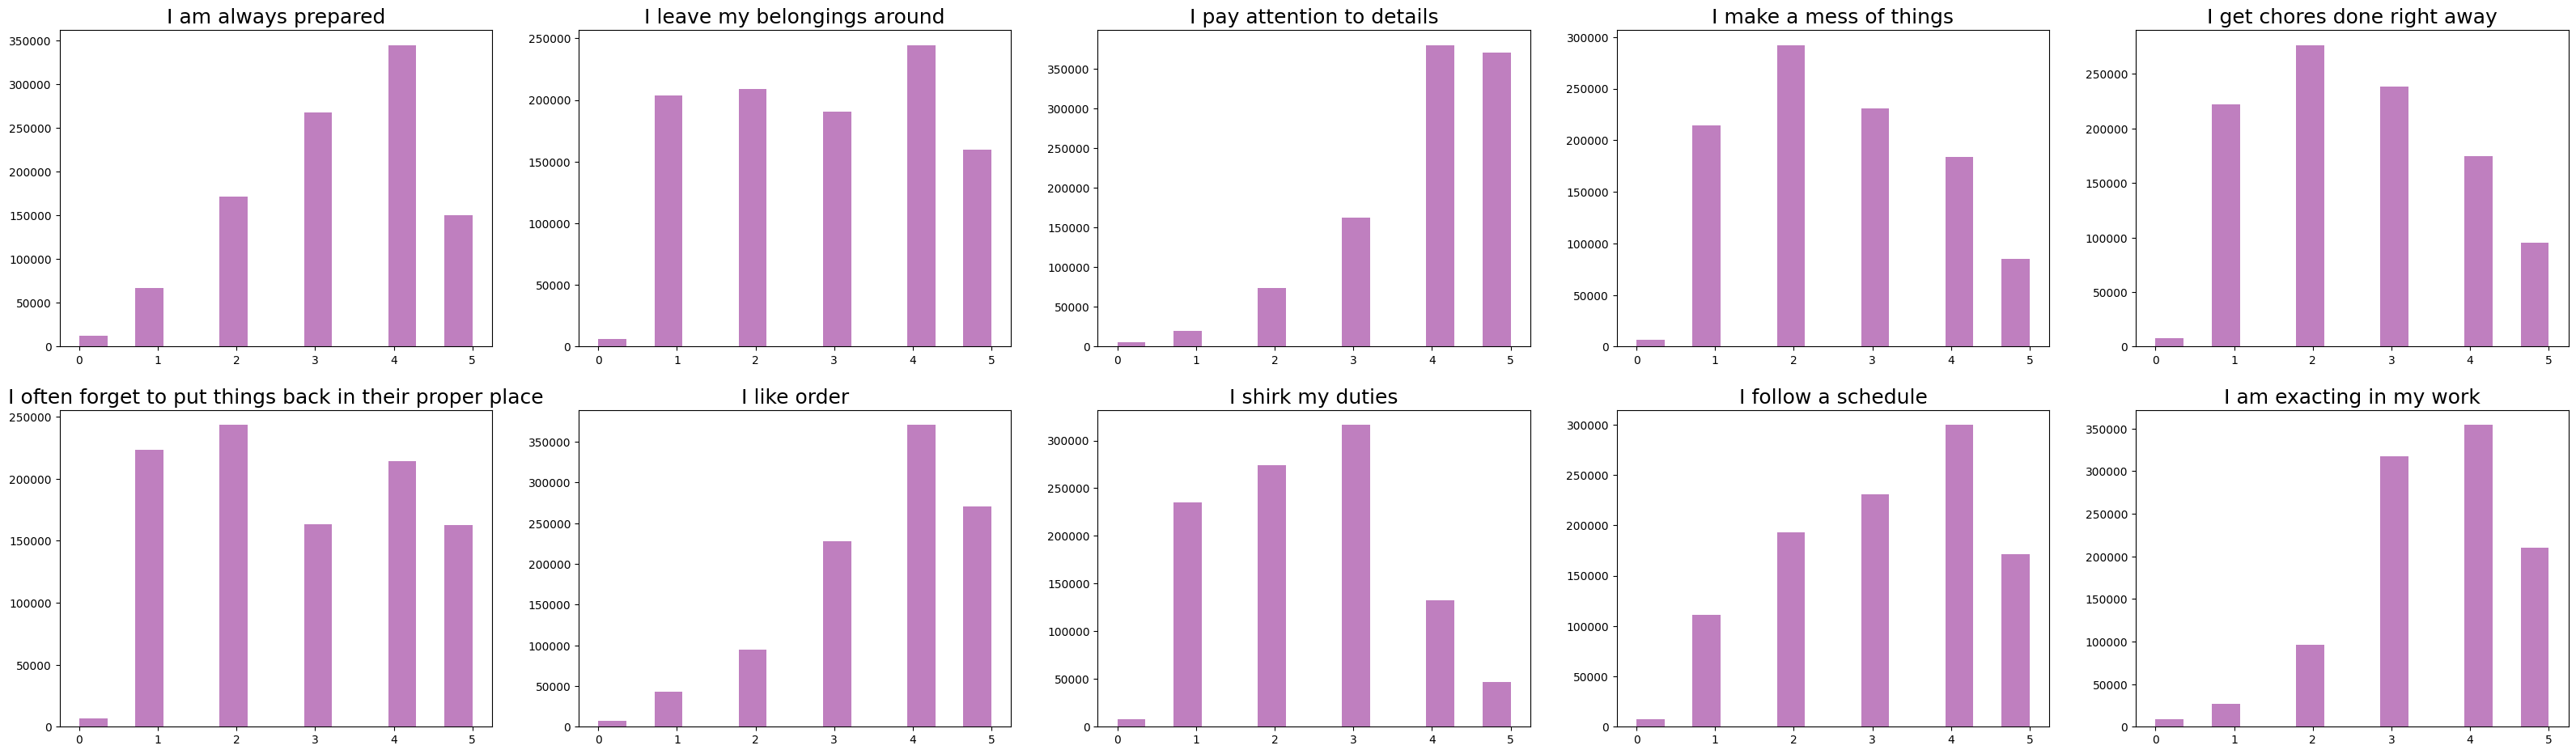

In [ ]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'purple')

Q&As Related to Open Personality


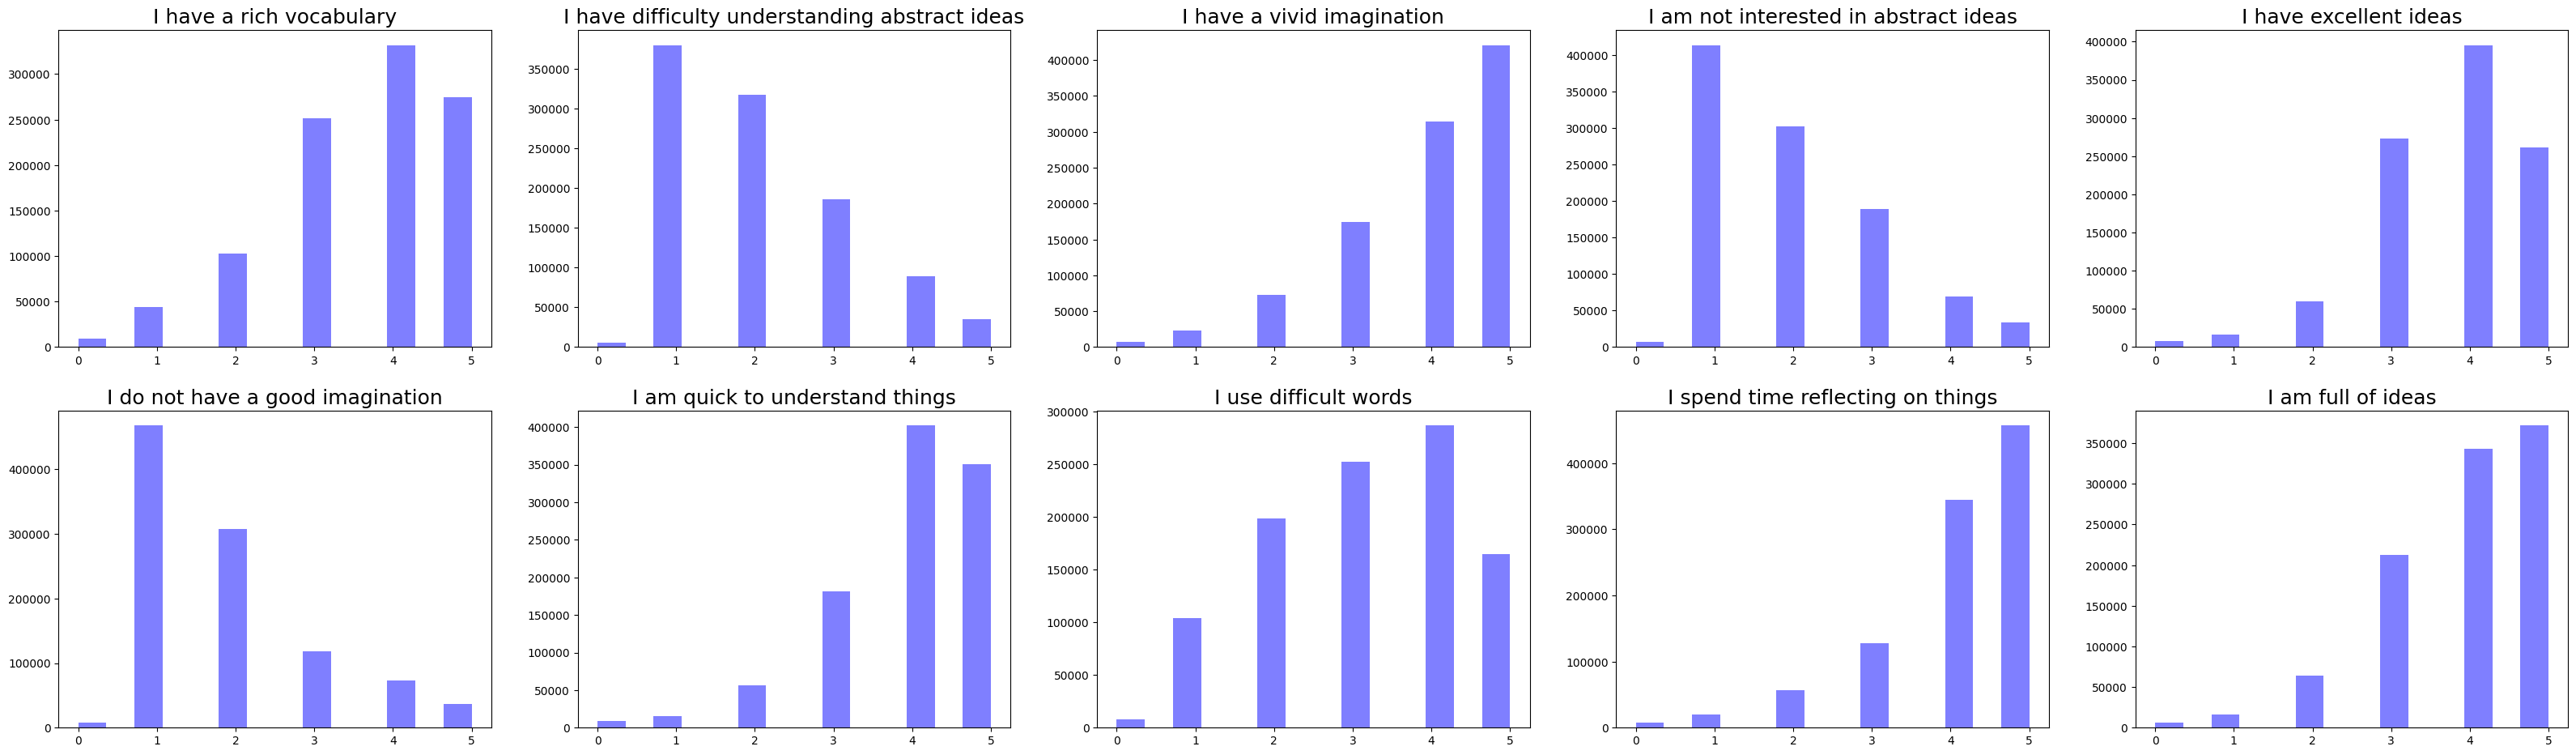

In [ ]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'blue')

## How many clusters should we define?

In [ ]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

/home/shahnur00/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/shahnur00/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/shahnur00/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/shahnur00/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/shahnur00/.loc

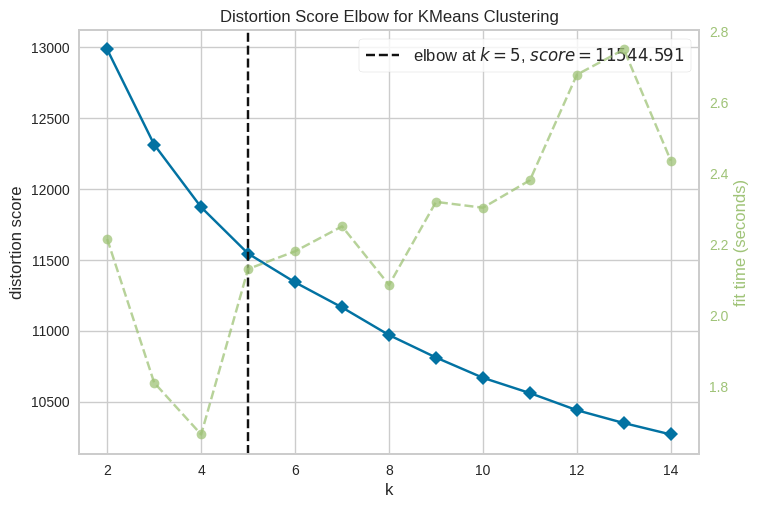

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

As you can see 5 clusters looks optimum for the data set and we already know this researh is to identify 5 different personalities.

## Clustering Participants into 5 Personality Groups

In [ ]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# I use the unscaled data but without the country column
df_model = data.drop('country', axis=1)

# I define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

/home/shahnur00/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,3
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,0
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,0
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,4
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,3


## Analysing the Model and Predictions

How many individual do we have for each cluster?

In [ ]:
df_model.Clusters.value_counts()

2    226132
0    212562
3    209826
1    200101
4    164860
Name: Clusters, dtype: int64

Let's group the results acording to clusters. That way we can investigate the average answer to the each question for each cluster.

That way we can have an intuition about how our model classifies people.

In [ ]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.129125,3.297805,3.093559,3.658918,2.963422,2.702412,2.210334,3.998010,2.329400,4.131016,3.515929,3.071593,4.161054,2.601942,2.829386,2.801479,2.881644,2.443682,2.985143,2.717885,1.884645,3.939222,1.694324,4.353991,1.985355,4.147519,2.013977,3.983285,4.177807,3.720952,3.835422,2.231006,4.299226,2.024256,3.238744,2.077944,4.165853,2.018950,3.833460,3.891820,3.576157,2.138863,3.897446,2.063055,3.729001,1.965417,4.009752,2.987467,4.267334,3.816717
1,1.812600,3.623625,2.233892,4.051934,2.287130,3.191014,1.747053,4.064982,2.181084,4.472157,4.249294,2.460218,4.503326,2.145981,3.558528,3.859876,3.991199,3.761915,4.006457,3.932139,2.498848,3.334516,2.606799,3.806548,2.583790,3.824024,2.739981,3.409683,3.647543,3.047571,2.801580,3.361802,3.811000,3.481247,2.088380,3.506744,3.556764,3.047786,2.773699,3.306240,3.501017,2.382177,4.064113,2.136616,3.434101,2.086586,3.677738,3.179284,4.276056,3.723779
2,3.455159,1.911322,3.796124,2.500473,4.043789,1.829816,3.657704,2.763448,3.769024,2.995724,3.801943,2.933977,4.236499,2.416699,3.281827,3.458241,3.800033,3.448570,3.650204,3.166221,2.162551,4.271443,2.658620,4.178511,2.004166,3.992606,1.858844,3.894429,4.126590,3.844277,2.953058,3.610360,3.837617,3.237888,2.231635,3.527568,3.454058,2.829825,2.941375,3.476589,3.738816,2.116264,4.246422,1.966542,3.957542,1.771806,3.962354,3.374901,4.186095,4.201772
3,3.467721,1.948376,4.336779,2.222851,4.261159,1.668540,3.881707,2.812816,3.739217,2.518358,2.317678,3.823559,3.151406,3.285570,2.110940,1.895852,2.105821,1.672700,2.112198,1.716217,1.894479,4.429556,1.829011,4.245475,1.858669,3.845300,1.589636,4.096613,4.098015,4.193908,3.718700,2.574547,4.193232,1.893069,3.142551,2.275304,3.872151,1.932863,3.582940,3.876355,3.884785,1.753415,4.081205,1.795130,4.157969,1.654561,4.315056,3.234056,4.095813,4.294473
4,2.181142,3.295966,2.788657,3.412047,2.578272,2.769702,2.111452,3.533246,2.640119,3.794577,2.344905,3.619999,2.993164,2.919392,2.322389,2.012423,2.300018,1.920678,2.579564,2.245766,3.024166,2.928903,2.569908,2.775482,3.149448,2.650934,3.003294,2.850510,2.603791,2.976501,3.145275,2.828115,3.668410,2.407382,2.370981,2.738602,3.380268,2.511391,2.772437,3.339967,3.533823,1.978297,3.613393,2.058892,3.620223,2.044347,3.883986,3.108013,3.699066,3.664515


Let's sum up the each question groups (EXT, EST ..) and see if we can see a pattern.

In [ ]:

col_list = list(df_model)

ext = ['EXT1','EXT3','EXT5','EXT7','EXT9']
csn = ['CSN1','CSN3','CSN5','CSN7','CSN9','CSN10']
opn = ['OPN3','OPN5','OPN7','OPN8','OPN9','OPN10']
cpt = ['AGR1','AGR3','AGR5','AGR7']
est = ['EST2','EST4','EST5','EST6']
agr = ['AGR2','AGR4','AGR6','AGR8','AGR10','AGR9']
ınt = ['EXT2','EXT4','EXT6','EXT6','EXT10']
cst = ['OPN1','OPN2','OPN4','OPN6']
spt = ['CSN2','CSN4','CSN6','CSN8']
nrt = ['EST1','EST3','EST7','EST8','EST9','EST10']
my_sums = pd.DataFrame()

my_sums['Extroversion'] =  round(df_model[ext].sum(axis=1)*2/5, 1)
my_sums['Conscientious'] = round(df_model[csn].sum(axis=1)*2/6, 1)
my_sums['Open'] = round(df_model[opn].sum(axis=1)*2/6, 1)
my_sums['Competitiveness'] = round(df_model[cpt].sum(axis=1)*2/4 ,1)
my_sums['Emotionally_stable'] = round(df_model[est].sum(axis=1)*2/4,1)
my_sums['Agreeable'] = round(df_model[agr].sum(axis=1)*2/6,1)
my_sums['Introversion'] = round(df_model[ınt].sum(axis=1)*2/5,1)
my_sums['Consistency'] = round(df_model[cst].sum(axis=1)*2/4,1)
my_sums['Spontaneity'] = round(df_model[spt].sum(axis=1)*2/4,1)
my_sums['Neurotic'] = round(df_model[nrt].sum(axis=1)*2/6,1)

my_sums['clusters'] = predictions
my_sums.groupby('clusters').mean()

personality_groups = my_sums.groupby('clusters').mean()


# data_sums['clusters'] = predictions
# data_sums.groupby('clusters').mean()

# personality_groups.to_csv('Personality_groups.csv', index=False)

In [ ]:
# Visualizing the means for each cluster

# dataclusters = my_sums.groupby('clusters').mean()
# plt.figure(figsize=(22,3))
# for i in range(0, 5):
#     plt.subplot(1,5,i+1)
#     plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
#     plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
#     plt.title( 'Personality Group '+ str(i+1) + ' (Cluster)')
#     plt.xticks(rotation=45)
#     plt.ylim(0,4);

## Visualizing the Cluster Predictions

In [ ]:
# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-5.614520,-1.419191,3
1,0.673522,2.319904,0
2,-0.244787,1.577162,0
3,0.621537,0.842062,4
4,-4.681425,1.729661,3


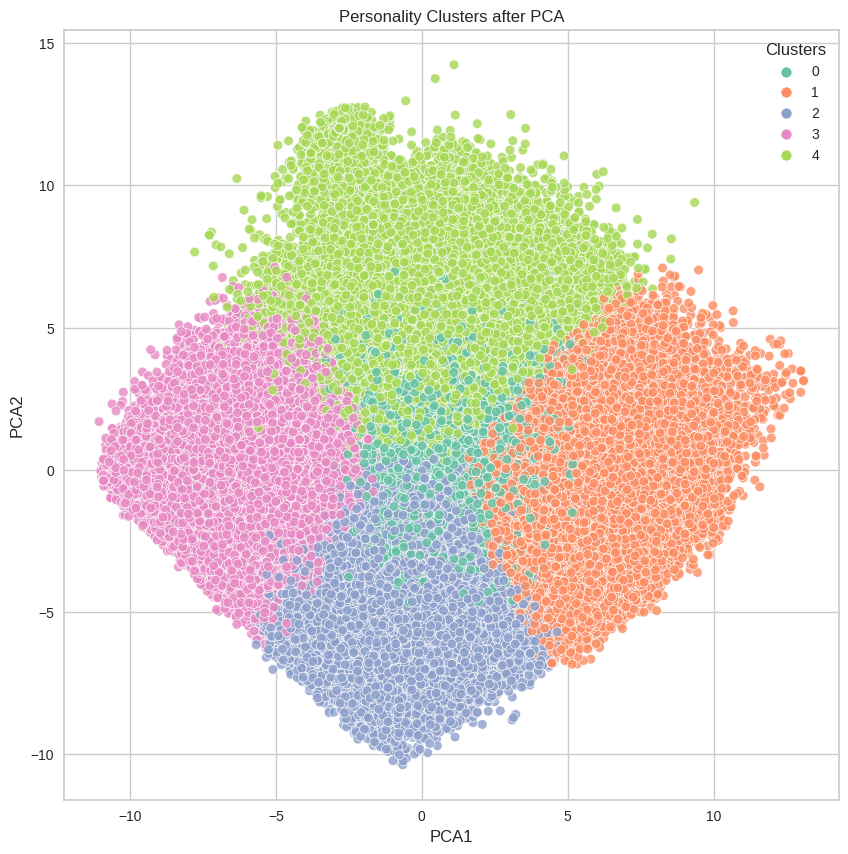

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

## Implementing the Model to See My Personality

I answered the questions in an Microsoft Excel spread sheet. 
Then I added that data into this notebook and put my answers to the model to see in which category I will be.

In [ ]:
my_data = pd.read_csv('./junayed.csv')
my_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,1,4,5,2,4,3,1,2,1,5,2,5,3,5,1,5,2,5,4,2,3,4,5,2,2,1,1,2,3,5,1,3,5,5,5,1,4,5,1,5,2,5,5,3,2,4,2,5,2,2


In [ ]:
my_personality = k_fit.predict(my_data)
print('My Personality Group (Cluster) : ', my_personality)

# added to show the clusters
my_sums.groupby('clusters').mean()



My Personality Group (Cluster) :  [4]


,Extroversion,Conscientious,Open,Competitiveness,Emotionally_stable,Agreeable,Introversion,Consistency,Spontaneity,Neurotic
clusters,,,,,,,,,,
0,5.090336,7.755013,7.569416,3.789151,5.652200,8.107841,6.597025,4.871746,4.176078,6.235210
1,4.104703,6.112491,7.451900,5.214709,6.012301,7.023270,7.411897,5.053198,6.698790,8.148587
2,7.488720,6.298060,7.976731,4.342090,6.045372,8.103066,4.426860,4.796714,6.602820,7.368081
3,7.874633,7.462158,8.060061,3.585897,5.557960,8.303593,4.010666,4.543946,4.337892,4.358317
4,4.919857,6.225878,7.196639,5.873408,5.437101,5.595394,6.416797,4.807679,5.242745,4.794491


In [ ]:
# S the my question groups
col_list = list(my_data)

ext = ['EXT1','EXT3','EXT5','EXT7','EXT9']
csn = ['CSN1','CSN3','CSN5','CSN7','CSN9','CSN10']
opn = ['OPN3','OPN5','OPN7','OPN8','OPN9','OPN10']
cpt = ['AGR1','AGR3','AGR5','AGR7']
est = ['EST2','EST4','EST5','EST6']
agr = ['AGR2','AGR4','AGR6','AGR8','AGR10','AGR9']
ınt = ['EXT2','EXT4','EXT6','EXT6','EXT10']
cst = ['OPN1','OPN2','OPN4','OPN6']
spt = ['CSN2','CSN4','CSN6','CSN8']
nrt = ['EST1','EST3','EST7','EST8','EST9','EST10']
my_sums = pd.DataFrame()

my_sums['Extroversion'] =  round(my_data[ext].sum(axis=1)*2/5, 1)
my_sums['Conscientious'] = round(my_data[csn].sum(axis=1)*2/6, 1)
my_sums['Open'] = round(my_data[opn].sum(axis=1)*2/6, 1)
my_sums['Competitiveness'] = round(my_data[cpt].sum(axis=1)*2/4 ,1)
my_sums['Emotionally_stable'] = round(my_data[est].sum(axis=1)*2/4,1)
my_sums['Agreeable'] = round(my_data[agr].sum(axis=1)*2/6,1)
my_sums['Introversion'] = round(my_data[ınt].sum(axis=1)*2/5,1)
my_sums['Consistency'] = round(my_data[cst].sum(axis=1)*2/4,1)
my_sums['Spontaneity'] = round(my_data[spt].sum(axis=1)*2/4,1)
my_sums['Neurotic'] = round(my_data[nrt].sum(axis=1)*2/6,1)


my_sums['cluster'] = my_personality

print('Details of my personality traits level (Out of 10)')
my_sums

Details of my personality traits level (Out of 10)


,Extroversion,Conscientious,Open,Competitiveness,Emotionally_stable,Agreeable,Introversion,Consistency,Spontaneity,Neurotic,cluster
0,5.2,8.0,7.3,9.0,3.0,5.0,9.6,4.0,5.5,6.3,4


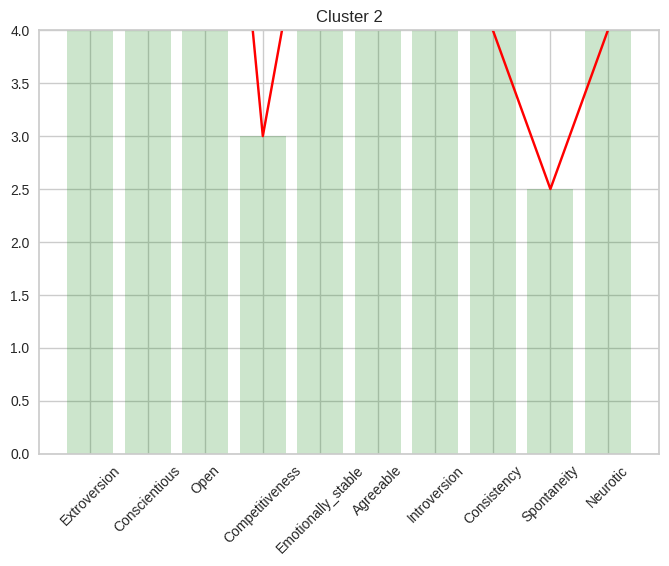

In [ ]:
my_sum = my_sums.drop('cluster', axis=1)
plt.bar(my_sum.columns, my_sum.iloc[0,:], color='green', alpha=0.2)
plt.plot(my_sum.columns, my_sum.iloc[0,:], color='red')
plt.title('Cluster 2')
plt.xticks(rotation=45)
plt.ylim(0,4);

You can fork my notebook and put your answers in order to see your personality too. 

Don't forget to upvote if you liked my work.

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [16]:
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))

In [20]:
import pickle
file = './Model/ML_Model1.pkl'
with open(file, 'wb') as f:
    pickle.dump(SVC, f)

In [ ]:
with open(file, 'rb') as f:
    k = pickle.load(f)